# 7

## (i)

The exponential distribution with rate parameter $ \lambda = 2 $ has the pdf: 

$$
f(q) = \lambda e^{-\lambda q}, \quad \text{for } q \geq 0.
$$

In HMC, the potential energy function $ U(q) $ is defined as the negative logarithm of the target pdf:

$$
U(q) = -\ln f(q) = -\ln\left( \lambda e^{-\lambda q} \right).
$$

Using logarithm properties:

$$
U(q) = -\left( \ln \lambda - \lambda q \right) = -\ln \lambda + \lambda q.
$$

Therefore, the potential energy function is:

$$
U(q) = \lambda q - \ln \lambda.
$$

## (ii)

In HMC, the dynamics are governed by the gradient of $ U(q) $, specifically $ \frac{dU}{dq} $. Additive constants in $ U(q) $ dont affect teh gradient. Therefore, we can omit the constant term $ -\ln \lambda $ without affecting the HMC dynamics.

The minimal form of $ U(q) $ is:

$$
U(q) = \lambda q.
$$

# (iii) in pseudocode


In [ ]:
# During each leapfrog step:
# if q_new < 0:
#     q_new = -q_new      # Reflect position back into the positive domain
#     p_new = -p_new      # Reverse momentum to conserve energy

# (iv)

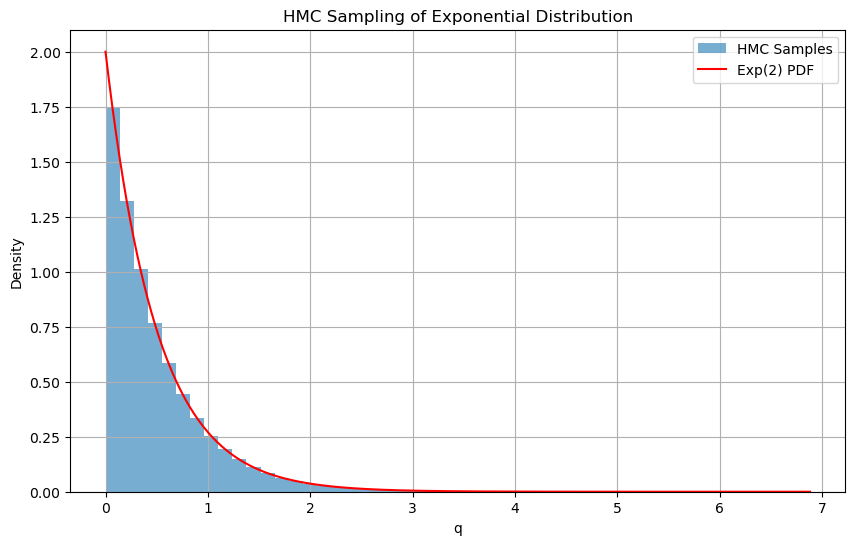

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 2
num_samples = 10**6
L = 25
epsilon = 0.1

#potential energy function and gradient
def U(q):
    return lambda_param * q  #minimal form without constant

def grad_U(q):
    return lambda_param

def H(q, p):
    return U(q) + 0.5 * p**2

def leapfrog(q, p, epsilon, L):
    q_new = q
    p_new = p - 0.5 * epsilon * grad_U(q_new)

    for _ in range(L):
        q_new = q_new + epsilon * p_new

        if q_new < 0:
            q_new = -q_new
            p_new = -p_new

        if _ != L - 1:
            p_new = p_new - epsilon * grad_U(q_new)

    p_new = p_new - 0.5 * epsilon * grad_U(q_new)

    p_new = -p_new

    return q_new, p_new

samples = []
q_current = np.random.exponential(1 / lambda_param)  # Initial position

for _ in range(num_samples):
    p_current = np.random.randn()

    q_proposed, p_proposed = leapfrog(q_current, p_current, epsilon, L)

    current_H = H(q_current, p_current)
    proposed_H = H(q_proposed, p_proposed)

    accept_prob = np.exp(current_H - proposed_H)
    if np.random.rand() < accept_prob:
        q_current = q_proposed  #accept

    samples.append(q_current)

samples = np.array(samples)

plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.6, label='HMC Samples')

#theoretical pdf
q_vals = np.linspace(0, bins[-1], 1000)
pdf_vals = lambda_param * np.exp(-lambda_param * q_vals)
plt.plot(q_vals, pdf_vals, 'r-', label='Exp(2) PDF')

plt.xlabel('q')
plt.ylabel('Density')
plt.title('HMC Sampling of Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

### (v) Reported Value of Step Size $ \epsilon $

The step size used in the simulation is:

$$
\epsilon = 0.1
$$

Because the histogram closely aligns with the theoretical pdf using $ \epsilon = 0.1 $.